In [69]:
#first of all, load the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#this is needed to create a (world) map:
import folium

In [70]:
#name the (possibly to be imported) datasets:
path = "kaggle_dataset/"
circuits = "circuits.csv"
constructor_results = "constructor_results.csv"
constructor_standings = "constructor_standings.csv"

In [71]:
#get a list of all the files in the dataset and store them in a list:
file_list = os.listdir(path)
print(file_list)

['circuits.csv', 'constructors.csv', 'constructor_results.csv', 'constructor_standings.csv', 'drivers.csv', 'driver_standings.csv', 'lap_times.csv', 'pit_stops.csv', 'qualifying.csv', 'races.csv', 'results.csv', 'seasons.csv', 'sprint_results.csv', 'status.csv']


In [72]:
#now we want to make a separate dataset for each file in our file_list.
#additionally, we want to store the names of our pandas dataframe in a list so we can recall it easier:
pd_dataframe_list = []
for dataset in file_list:
    df = pd.read_csv(f"{path}{dataset}")
    globals()[f"df_{dataset[0:-4]}"] = df
    pd_dataframe_list.append(f"df_{dataset[0:-4]}")
print(f"These are our dataframes:\n{pd_dataframe_list}")

These are our dataframes:
['df_circuits', 'df_constructors', 'df_constructor_results', 'df_constructor_standings', 'df_drivers', 'df_driver_standings', 'df_lap_times', 'df_pit_stops', 'df_qualifying', 'df_races', 'df_results', 'df_seasons', 'df_sprint_results', 'df_status']


In [73]:
#starting with the dataframe for circuit information:
space_in_between = "\n\n" + "*"*20
print("First five rows of the circuits dataset:")
print(df_circuits.head())
print(space_in_between)
print("\n\nInformation on the circuits dataset:")
print(df_circuits.info())
print(space_in_between)
#print("\n\nFurther measurements on the circuits dataset:")
#print(df_circuits.describe())
#print(space_in_between)
print(f"\n\nThe Circuits dataframe has {df_circuits.shape[0]} rows and {df_circuits.shape[1]} columns")
print(space_in_between)
#print how many unique values we have:
print("\n\nUnique Values for country:")
country_list = df_circuits["country"].unique()
print(country_list)
print(f"This is a total of {len(country_list)} different countries.")


First five rows of the circuits dataset:
   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Cir

So we seem to be having quite some information here. It does not make sense to calculate some mean or median on this data set because the information of circuits which is numerical does not make sense to be calculated (e.g. circuitID or latitude). On the other hand, we seem to be having no "Null" values which speaks for a rather complete dataset. So this is obviously just some kind of "informational" dataset about all the (possible) circuits on which a formula 1 race has taken place throughtout the decades. What we can analyze, though, is the number of circuits in each country. Above, we can also see unique values for Country, displaying all the different countries in which circuits are based.

In [74]:
#get the number of circuits in each country:
print(df_circuits["country"].value_counts())

#if it was a way larger dataset, we could also get the maximum number of circuits through code or even the name
#of the country:
#print((df_circuits["country"].value_counts()).max())
#a = df_circuits["country"].value_counts()
#print(f"The country with the most circuits is {a.index[0]} with {a[0]} circuits")

USA             11
France           7
Spain            6
Portugal         4
UK               4
Italy            4
Japan            3
Canada           3
Germany          3
Belgium          3
Austria          2
South Africa     2
Brazil           2
Australia        2
Singapore        1
China            1
Saudi Arabia     1
Azerbaijan       1
Russia           1
India            1
Switzerland      1
Morocco          1
Bahrain          1
Sweden           1
Netherlands      1
Korea            1
Mexico           1
Turkey           1
Monaco           1
Argentina        1
UAE              1
Malaysia         1
Hungary          1
Qatar            1
Name: country, dtype: int64


So we could find out that the USA has the most circuits in their country. There are many countries which do only have one circuit (not included, of course, are all the countries which do not have one single circuit). Let us plot the above overview in a pie plot now.

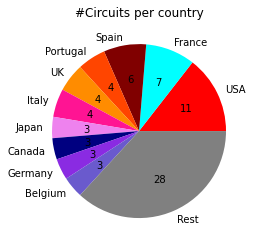

In [75]:
#THIS PART HAS DEFINITELY TO BE REFACTORED

#plot a pie plot to get a better overview on the number of circuits per country:
a = df_circuits["country"].value_counts()

#this is the regular pie, which is a little too less compact:
#plt.pie(a, labels = a.index)

#so we'll summarize data points which are <= 2. First of all, find out how many belong to the "Rest" group:
rest_value = 0
for datapoint in a:
    if datapoint <= 2:
        rest_value += datapoint

#Get all the values in a specific list. We'll need this to remove the ones and twos later:
values_new_a = []
for i in a.values:
    values_new_a.append(i)
    
#also get all the indices in a specific list:
countries_new_a = []
for i in a.index:
    countries_new_a.append(i)

#make them a dictionary and remove all values with 1 or 2:
dict_a = dict(zip(countries_new_a, values_new_a))
dict_a = {key:val for key, val in dict_a.items() if val > 2}
dict_a["Rest"] = rest_value

countries_new_a = list(dict_a.keys())
values_new_a = list(dict_a.values())

a = np.array(values_new_a)
sum_a = a.sum()
b = np.array(countries_new_a)

#get our prefered colors which represent the formula 1 accordingly:
colors_pie = ["red", "aqua", "maroon", "orangered", "darkorange", "deeppink", "violet",
              "navy", "blueviolet", "slateblue", "grey", "midnightblue", "black", "cyan", "deepskyblue"]

#plotting the pie with percentages:
#plt.pie(a, labels = b, autopct = '%1.1f%%', colors = colors_pie)

#plotting the pie with the actual values which might be more informative:
plt.pie(a, labels = b, autopct = lambda p: "{:.0f}".format(p * sum_a / 100), colors = colors_pie)

plt.title("#Circuits per country")
plt.show()

In [76]:
#why not plot the places in a world map now?
#for this, we want to add each row into the world map because these are all different locations:
print(df_circuits[["country", "lat", "lng"]])

         country       lat        lng
0      Australia -37.84970  144.96800
1       Malaysia   2.76083  101.73800
2        Bahrain  26.03250   50.51060
3          Spain  41.57000    2.26111
4         Turkey  40.95170   29.40500
..           ...       ...        ...
71      Portugal  37.22700   -8.62670
72         Italy  43.99750   11.37190
73  Saudi Arabia  21.63190   39.10440
74         Qatar  25.49000   51.45420
75           USA  25.95810  -80.23890

[76 rows x 3 columns]


In [77]:
#create a tuple list with all the latitudes and longitues for each circuit:
latlon_list = []
for i in range(len(df_circuits)):
    lat = df_circuits["lat"][i]
    lng = df_circuits["lng"][i]
    tuple = (lat, lng)
    latlon_list.append(tuple)

In [80]:
#create a map (starting at Great Britain) and add the lat and lng values of our tuple list for each circuit location:
mapit = folium.Map(location = [52.667989, -1.464582], zoom_start = 6)
for coord in latlon_list:
    folium.Marker(location = [coord[0], coord[1]], fill_color = "blue", radius = 8).add_to(mapit)

mapit.save("map_circuits.html")
mapit
